In [1]:
!pip install mlxtend --upgrade
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import log_loss
from yellowbrick.classifier import ROCAUC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [4]:
def Classifier_Report(clf, x_train , y_train  , x_test , y_test ,label_name, model_name):

  if label_name == 'Sex' :
    labels  = ['female','male']
  else:
    labels  = ['angry','happy','sad','neutral']

  clf.fit(x_train,y_train) 

  pred_test = clf.predict(x_test)
  score_test = accuracy_score(pred_test, y_test)
  print(label_name+" "+ model_name +"accuracy score on Test data for {} : {:.4f}".format(label_name, score_test))
  print(label_name+" "+model_name+" classification report on test data")
  print (classification_report(pred_test,  y_test ,target_names = labels))
  cm_test = confusion_matrix(pred_test,  y_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=labels)
  disp.plot()
  plt.title(label_name+" "+ model_name +" Confusion Matrix on Test data ")
  plt.show()
  if model_name!="SVM":
    visualizer = ROCAUC(clf)
    visualizer.fit(x_train, y_train)        
    visualizer.score(x_test, y_test)        
    visualizer.show()  
    
  
  pred_train=clf.predict(x_train)
  score_train = accuracy_score(pred_train, y_train)
  print(label_name+" "+ model_name +"accuracy score on Train data for {} : {:.4f}".format(label_name, score_train))
  print("")
  print(label_name+" "+ model_name +" classification report on train data")
  print (classification_report(pred_train,  y_train ,target_names = labels))
  print("")
  cm_train = confusion_matrix(pred_train,  y_train)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=labels)
  disp.plot()
  plt.title(label_name+" "+ model_name +" Confusion Matrix on Train data ")
  plt.show()

# **Spectogram Features **

In [5]:
x_train=pd.read_csv('X_train_spectgram.csv')
y_train=pd.read_csv('Y_train_spectgram.csv')
x_test=pd.read_csv('X_test_spectgram.csv')
y_test=pd.read_csv('Y_test_spectgram.csv')
x_train.drop(columns=x_train.columns[0], axis=1, inplace=True)
x_test.drop(columns=x_test.columns[0], axis=1, inplace=True)

** K Nearest Neighbors**

Emotion

accuracy score on Test data for emotion_ID : 0.6029
emotion_ID classification report on test data
              precision    recall  f1-score   support

       angry       0.60      0.64      0.62      1182
       happy       0.51      0.64      0.57       986
         sad       0.66      0.55      0.60      1529
     neutral       0.63      0.61      0.62      1272

    accuracy                           0.60      4969
   macro avg       0.60      0.61      0.60      4969
weighted avg       0.61      0.60      0.60      4969



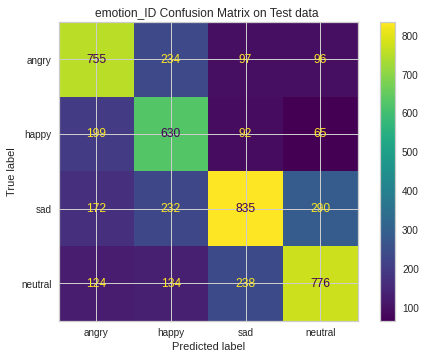

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


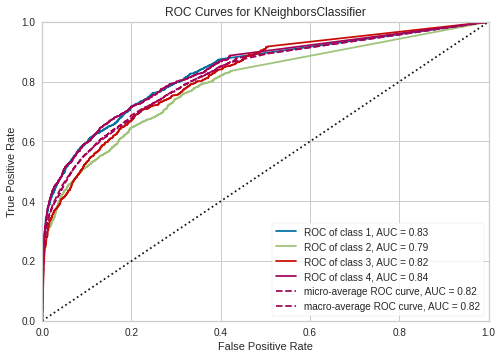

accuracy score on Train data for emotion_ID : 1.0000
emotion_ID classification report on train data
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2944
       happy       1.00      1.00      1.00      2943
         sad       1.00      1.00      1.00      2945
     neutral       1.00      1.00      1.00      2978

    accuracy                           1.00     11810
   macro avg       1.00      1.00      1.00     11810
weighted avg       1.00      1.00      1.00     11810



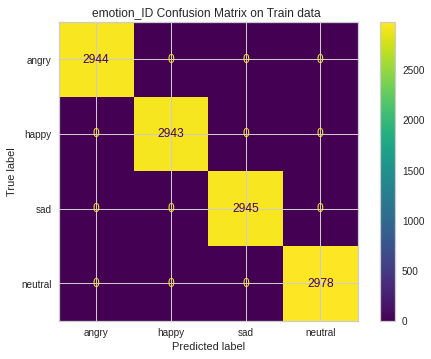

In [ ]:
knn_emotion = KNeighborsClassifier( weights='distance')
param_grid = {'n_neighbors':np.arange(1,15),
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['manhattan','euclidean']}
gs = GridSearchCV(estimator=knn_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","KNN")


Sex

best parameters{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4}
max validation score0.9955124640940339
accuracy score on Test data for Sex : 0.9561
Sex classification report on test data
              precision    recall  f1-score   support

      female       0.99      0.92      0.96      2624
        male       0.92      0.99      0.96      2345

    accuracy                           0.96      4969
   macro avg       0.96      0.96      0.96      4969
weighted avg       0.96      0.96      0.96      4969



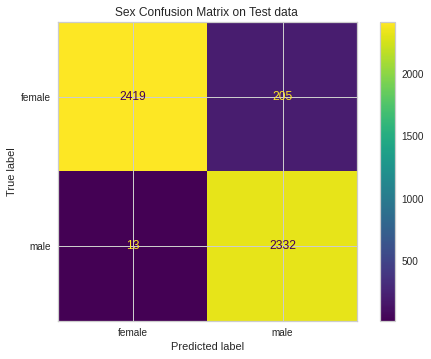

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


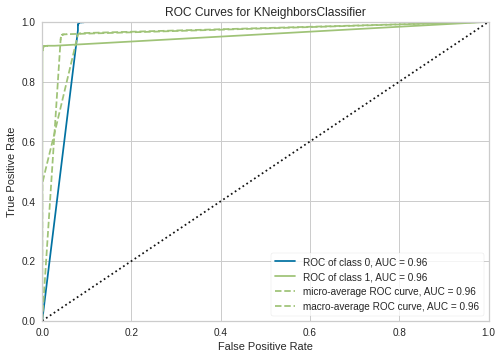

accuracy score on Train data for Sex : 1.0000
Sex classification report on train data
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      5665
        male       1.00      1.00      1.00      6145

    accuracy                           1.00     11810
   macro avg       1.00      1.00      1.00     11810
weighted avg       1.00      1.00      1.00     11810



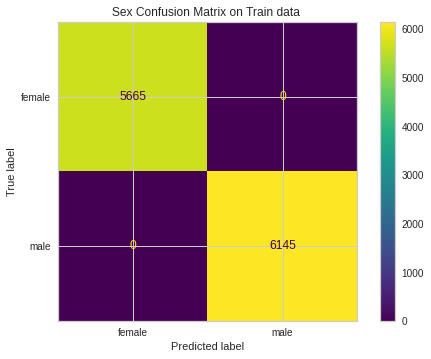

In [ ]:
knn_sex = KNeighborsClassifier( weights='distance')
param_grid = {'n_neighbors':np.arange(1,15),
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['manhattan','euclidean']}
gs = GridSearchCV(estimator=knn_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","KNN")



**SVM**

emotion

best parameters{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}
max validation score0.5669780280956226
accuracy score on Test data for emotion_ID : 0.5760
emotion_ID classification report on test data
              precision    recall  f1-score   support

       angry       0.56      0.62      0.59      1142
       happy       0.62      0.51      0.56      1499
         sad       0.55      0.59      0.57      1160
     neutral       0.58      0.60      0.59      1168

    accuracy                           0.58      4969
   macro avg       0.58      0.58      0.58      4969
weighted avg       0.58      0.58      0.58      4969



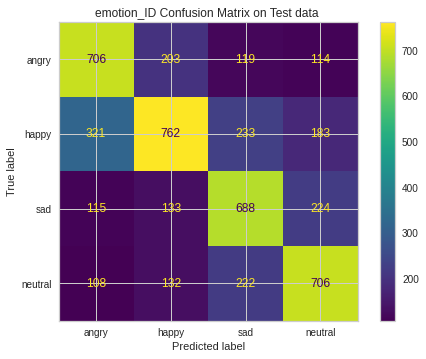

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


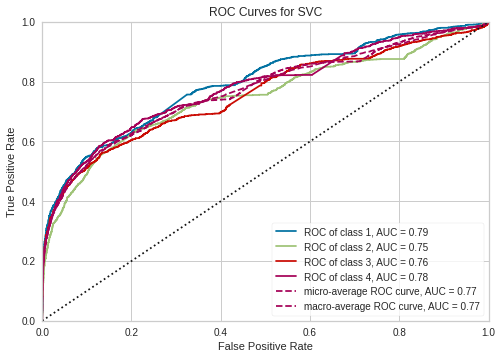

accuracy score on Train data for emotion_ID : 0.9992
emotion_ID classification report on train data
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2943
       happy       1.00      1.00      1.00      2944
         sad       1.00      1.00      1.00      2945
     neutral       1.00      1.00      1.00      2978

    accuracy                           1.00     11810
   macro avg       1.00      1.00      1.00     11810
weighted avg       1.00      1.00      1.00     11810



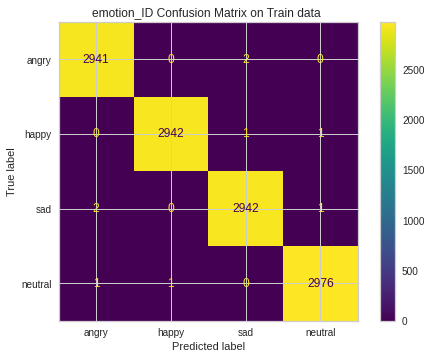

In [ ]:
clf_svm_emotion = SVC(kernel='rbf',   random_state=42 ,degree=10)
param_grid = {'C':np.arange(1,5),'kernel':['poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }
gs = GridSearchCV(estimator=clf_svm_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","SVM")


sex

best parameters{'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}
max validation score0.9555461473327689
Sex SVMaccuracy score on Test data for Sex : 0.9543
Sex SVM classification report on test data
              precision    recall  f1-score   support

      female       0.96      0.95      0.95      2469
        male       0.95      0.96      0.95      2500

    accuracy                           0.95      4969
   macro avg       0.95      0.95      0.95      4969
weighted avg       0.95      0.95      0.95      4969



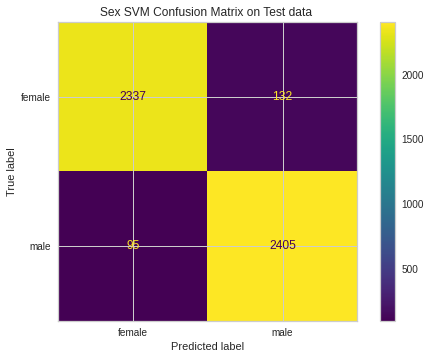

Sex SVMaccuracy score on Train data for Sex : 0.9901

Sex SVM classification report on train data
              precision    recall  f1-score   support

      female       0.99      0.99      0.99      5682
        male       0.99      0.99      0.99      6128

    accuracy                           0.99     11810
   macro avg       0.99      0.99      0.99     11810
weighted avg       0.99      0.99      0.99     11810




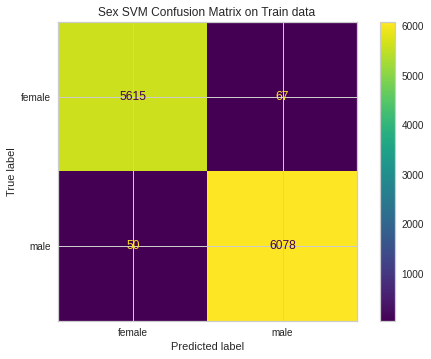

In [ ]:
clf_svm_sex = SVC(kernel='rbf',   random_state=42 ,degree=10)
param_grid = {'C':np.arange(1,5),'kernel':['poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }
gs = GridSearchCV(estimator=clf_svm_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","SVM")


**MLP**

emotion

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


best parameters{'activation': 'relu', 'hidden_layer_sizes': 19, 'solver': 'adam'}
max validation score0.4635901778154107


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


emotion_ID MLPaccuracy score on Test data for emotion_ID : 0.4727
emotion_IDMLP classification report on test data
              precision    recall  f1-score   support

       angry       0.52      0.54      0.53      1216
       happy       0.47      0.50      0.48      1144
         sad       0.49      0.47      0.48      1320
     neutral       0.42      0.40      0.41      1289

    accuracy                           0.47      4969
   macro avg       0.47      0.47      0.47      4969
weighted avg       0.47      0.47      0.47      4969



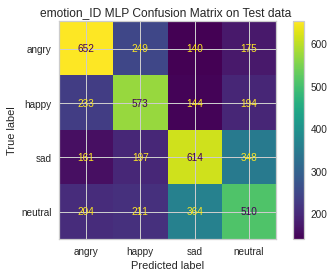

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


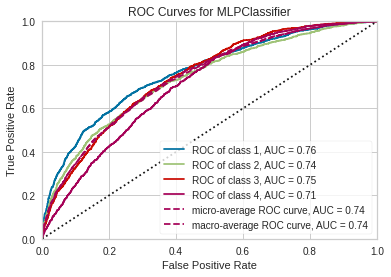

emotion_ID MLPaccuracy score on Train data for emotion_ID : 0.5310
emotion_ID MLP classification report on train data
              precision    recall  f1-score   support

       angry       0.57      0.57      0.57      2948
       happy       0.55      0.56      0.56      2893
         sad       0.53      0.51      0.52      3057
     neutral       0.47      0.48      0.47      2912

    accuracy                           0.53     11810
   macro avg       0.53      0.53      0.53     11810
weighted avg       0.53      0.53      0.53     11810



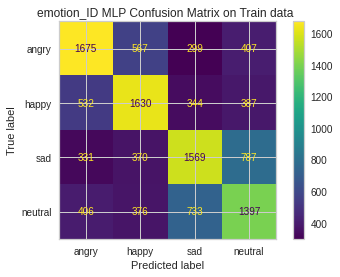

In [ ]:
clf_mlp_emotion = MLPClassifier( learning_rate='adaptive',max_iter=100,random_state=1)
param_grid = {'hidden_layer_sizes':np.arange(15,25),
              'activation':[ 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam']}
gs = GridSearchCV(estimator=clf_mlp_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","MLP")


sex

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


best parameters{'activation': 'relu', 'hidden_layer_sizes': 19, 'solver': 'adam'}
max validation score0.9347163420829805


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Sex MLPaccuracy score on Test data for Sex : 0.9332
SexMLP classification report on test data
              precision    recall  f1-score   support

      female       0.93      0.93      0.93      2434
        male       0.93      0.93      0.93      2535

    accuracy                           0.93      4969
   macro avg       0.93      0.93      0.93      4969
weighted avg       0.93      0.93      0.93      4969



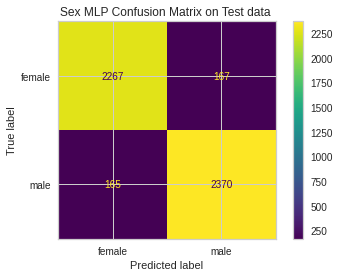

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


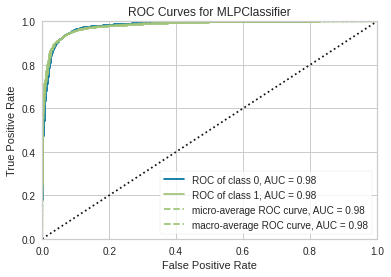

Sex MLPaccuracy score on Train data for Sex : 0.9670
Sex MLP classification report on train data
              precision    recall  f1-score   support

      female       0.96      0.97      0.97      5629
        male       0.97      0.97      0.97      6181

    accuracy                           0.97     11810
   macro avg       0.97      0.97      0.97     11810
weighted avg       0.97      0.97      0.97     11810



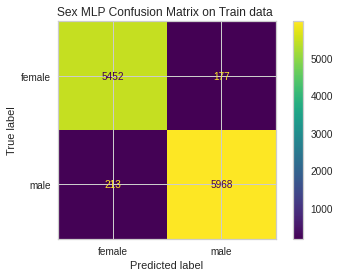

In [ ]:
clf_mlp_sex = MLPClassifier( learning_rate='adaptive',max_iter=100,random_state=1)
param_grid = {'hidden_layer_sizes':np.arange(15,20),
              'activation':[ 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam']}
gs = GridSearchCV(estimator=clf_mlp_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","MLP")


**logistic regression**

emotion

best parameters{'solver': 'newton-cg'}
max validation score0.4292972057578323
emotion_ID LogisticRegressionaccuracy score on Test data for emotion_ID : 0.4446
emotion_ID LogisticRegression classification report on test data
              precision    recall  f1-score   support

       angry       0.50      0.50      0.50      1250
       happy       0.40      0.45      0.42      1080
         sad       0.50      0.44      0.47      1426
     neutral       0.38      0.39      0.38      1213

    accuracy                           0.44      4969
   macro avg       0.44      0.44      0.44      4969
weighted avg       0.45      0.44      0.45      4969



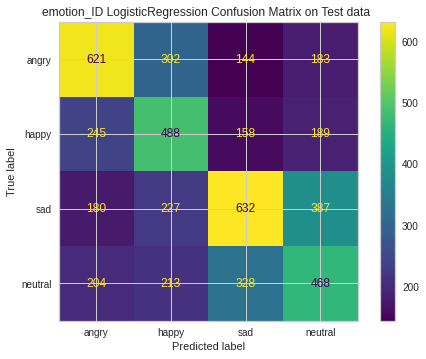

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


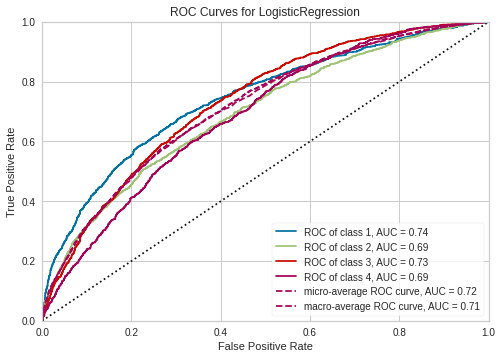

emotion_ID LogisticRegressionaccuracy score on Train data for emotion_ID : 0.4442

emotion_ID LogisticRegression classification report on train data
              precision    recall  f1-score   support

       angry       0.51      0.48      0.49      3158
       happy       0.39      0.44      0.41      2628
         sad       0.48      0.44      0.46      3197
     neutral       0.39      0.41      0.40      2827

    accuracy                           0.44     11810
   macro avg       0.44      0.44      0.44     11810
weighted avg       0.45      0.44      0.45     11810




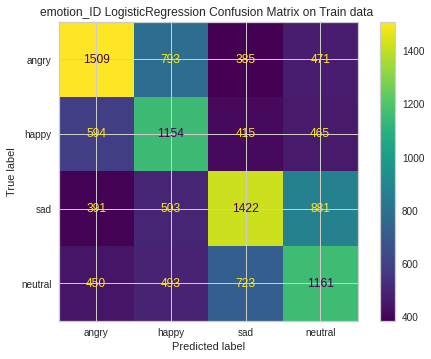

In [6]:
clf_logistic_emotion = LogisticRegression(max_iter=1000000,random_state=1, penalty = 'l2')
param_grid = {'solver':[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=clf_logistic_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","LogisticRegression")

sex

best parameters{'solver': 'newton-cg'}
max validation score0.9089754445385265
Sex LogisticRegressionaccuracy score on Test data for Sex : 0.9048
Sex LogisticRegression classification report on test data
              precision    recall  f1-score   support

      female       0.90      0.90      0.90      2435
        male       0.91      0.91      0.91      2534

    accuracy                           0.90      4969
   macro avg       0.90      0.90      0.90      4969
weighted avg       0.90      0.90      0.90      4969



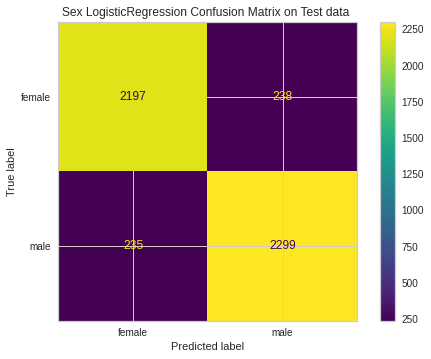

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


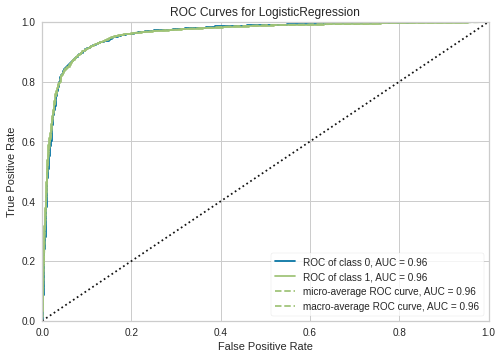

Sex LogisticRegressionaccuracy score on Train data for Sex : 0.9104

Sex LogisticRegression classification report on train data
              precision    recall  f1-score   support

      female       0.91      0.91      0.91      5651
        male       0.92      0.91      0.91      6159

    accuracy                           0.91     11810
   macro avg       0.91      0.91      0.91     11810
weighted avg       0.91      0.91      0.91     11810




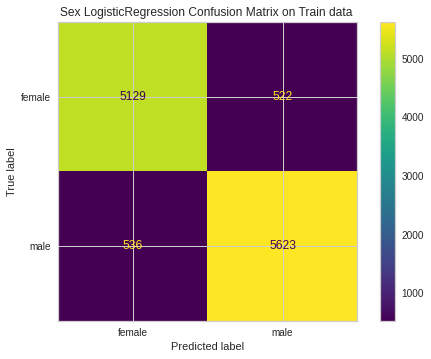

In [ ]:
clf_logistic_sex = LogisticRegression(max_iter=1000000,random_state=1, penalty = 'l2')
param_grid = {'solver':[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=clf_logistic_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","LogisticRegression")

# **Rythmic Features**

In [8]:
x_train=pd.read_csv('X_train_rythm.csv')
y_train=pd.read_csv('Y_train_rythm.csv')
x_test=pd.read_csv('X_test_rythm.csv')
y_test=pd.read_csv('Y_test_rythm.csv')
x_train.drop(columns=x_train.columns[0], axis=1, inplace=True)
x_test.drop(columns=x_test.columns[0], axis=1, inplace=True)

**KNN**

emotion

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


best parameters{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 14}
max validation score0.31524132091447926
emotion_ID KNNaccuracy score on Test data for emotion_ID : 0.3150
emotion_ID KNN classification report on test data
              precision    recall  f1-score   support

       angry       0.38      0.31      0.34      1540
       happy       0.30      0.34      0.32      1078
         sad       0.30      0.34      0.32      1093
     neutral       0.29      0.28      0.28      1258

    accuracy                           0.31      4969
   macro avg       0.31      0.32      0.31      4969
weighted avg       0.32      0.31      0.32      4969



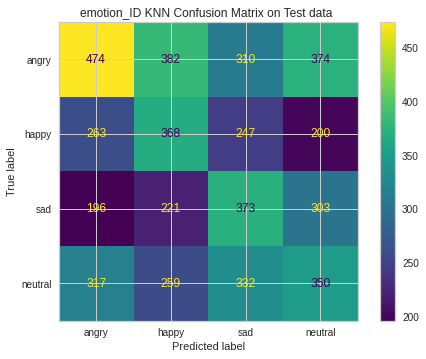

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


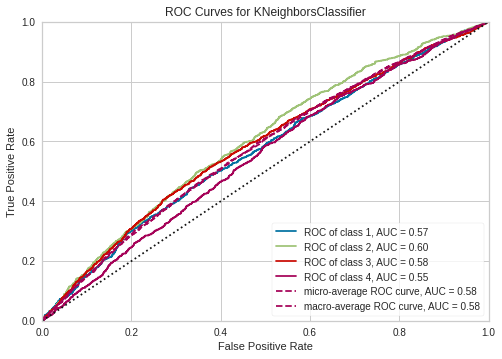

emotion_ID KNNaccuracy score on Train data for emotion_ID : 0.9988

emotion_ID KNN classification report on train data
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2952
       happy       1.00      1.00      1.00      2944
         sad       1.00      1.00      1.00      2936
     neutral       1.00      1.00      1.00      2978

    accuracy                           1.00     11810
   macro avg       1.00      1.00      1.00     11810
weighted avg       1.00      1.00      1.00     11810




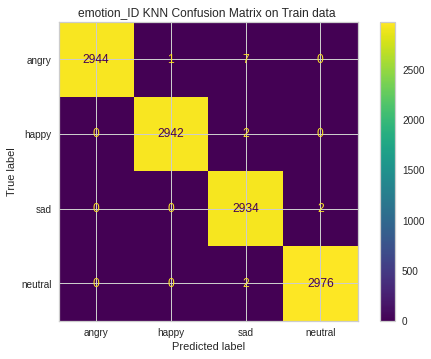

In [9]:
knn_emotion = KNeighborsClassifier( weights='distance')
param_grid = {'n_neighbors':np.arange(1,15),
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['manhattan','euclidean']}
gs = GridSearchCV(estimator=knn_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=2)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","KNN")


sex

best parameters{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 14}
max validation score0.5778999423852507
Sex KNNaccuracy score on Test data for Sex : 0.5554
Sex KNN classification report on test data
              precision    recall  f1-score   support

      female       0.39      0.57      0.46      1667
        male       0.72      0.55      0.62      3302

    accuracy                           0.56      4969
   macro avg       0.55      0.56      0.54      4969
weighted avg       0.61      0.56      0.57      4969



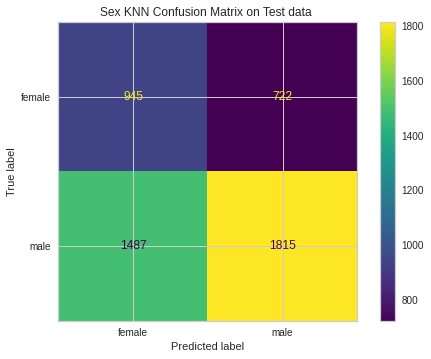

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


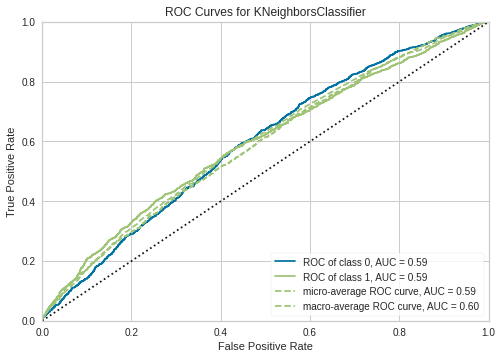

Sex KNNaccuracy score on Train data for Sex : 1.0000

Sex KNN classification report on train data
              precision    recall  f1-score   support

      female       1.00      1.00      1.00      5665
        male       1.00      1.00      1.00      6145

    accuracy                           1.00     11810
   macro avg       1.00      1.00      1.00     11810
weighted avg       1.00      1.00      1.00     11810




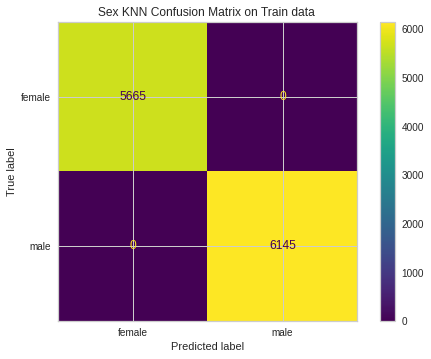

In [ ]:
knn_sex = KNeighborsClassifier( weights='distance')
param_grid = {'n_neighbors':np.arange(1,15),
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric':['manhattan','euclidean']}
gs = GridSearchCV(estimator=knn_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","KNN")



**SVM**

emotion

best parameters{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
max validation score0.3746824724809484
emotion_ID SVMaccuracy score on Test data for emotion_ID : 0.3804
emotion_ID SVM classification report on test data
              precision    recall  f1-score   support

       angry       0.39      0.38      0.38      1283
       happy       0.41      0.42      0.41      1205
         sad       0.39      0.38      0.39      1294
     neutral       0.33      0.34      0.34      1187

    accuracy                           0.38      4969
   macro avg       0.38      0.38      0.38      4969
weighted avg       0.38      0.38      0.38      4969



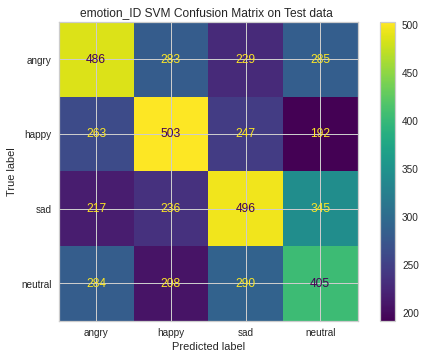

emotion_ID SVMaccuracy score on Train data for emotion_ID : 0.6028

emotion_ID SVM classification report on train data
              precision    recall  f1-score   support

       angry       0.61      0.58      0.60      3070
       happy       0.62      0.65      0.64      2823
         sad       0.60      0.58      0.59      3078
     neutral       0.58      0.61      0.59      2839

    accuracy                           0.60     11810
   macro avg       0.60      0.60      0.60     11810
weighted avg       0.60      0.60      0.60     11810




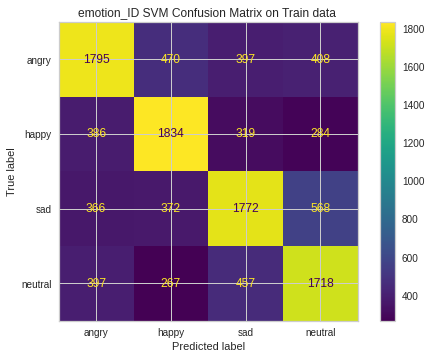

In [ ]:
clf_svm_emotion = SVC(kernel='rbf',   random_state=42 ,degree=10)
param_grid = {'C':np.arange(1,5),'kernel':['poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }
gs = GridSearchCV(estimator=clf_svm_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","SVM")


sex

best parameters{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
max validation score0.5998306519898391
Sex SVMaccuracy score on Test data for Sex : 0.6146
Sex SVM classification report on test data
              precision    recall  f1-score   support

      female       0.57      0.61      0.59      2273
        male       0.65      0.62      0.63      2696

    accuracy                           0.61      4969
   macro avg       0.61      0.61      0.61      4969
weighted avg       0.62      0.61      0.62      4969



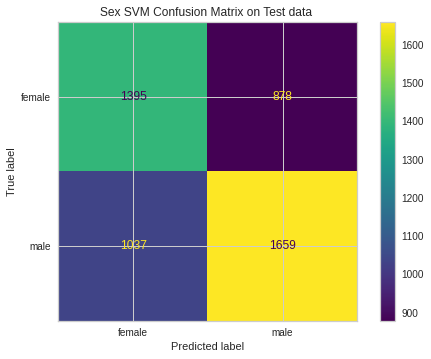

Sex SVMaccuracy score on Train data for Sex : 0.7615

Sex SVM classification report on train data
              precision    recall  f1-score   support

      female       0.69      0.79      0.74      4986
        male       0.83      0.74      0.78      6824

    accuracy                           0.76     11810
   macro avg       0.76      0.76      0.76     11810
weighted avg       0.77      0.76      0.76     11810




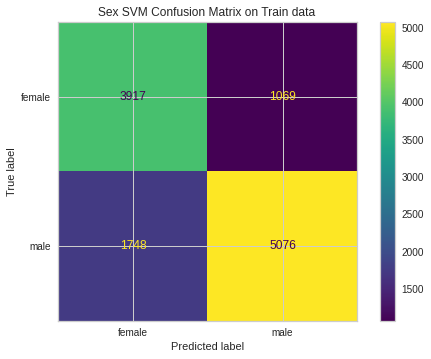

In [10]:
clf_svm_sex = SVC(kernel='rbf',   random_state=42 ,degree=10)
param_grid = {'C':np.arange(1,5),'kernel':['poly', 'rbf', 'sigmoid'],'gamma':['scale', 'auto'] }
gs = GridSearchCV(estimator=clf_svm_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=2)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","SVM")


**MLP**

emotion

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


best parameters{'activation': 'logistic', 'hidden_layer_sizes': 16, 'solver': 'sgd'}
max validation score0.37298866789467994


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


emotion_ID MLPaccuracy score on Test data for emotion_ID : 0.3669
emotion_ID MLP classification report on test data
              precision    recall  f1-score   support

       angry       0.34      0.36      0.35      1180
       happy       0.45      0.41      0.43      1348
         sad       0.39      0.38      0.39      1286
     neutral       0.29      0.31      0.30      1155

    accuracy                           0.37      4969
   macro avg       0.37      0.36      0.37      4969
weighted avg       0.37      0.37      0.37      4969



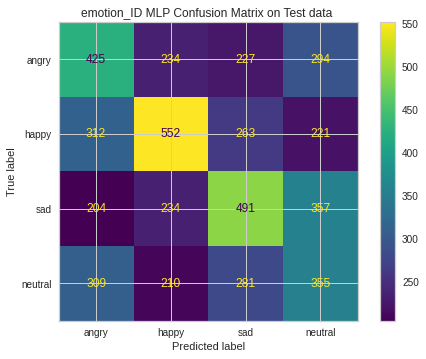

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


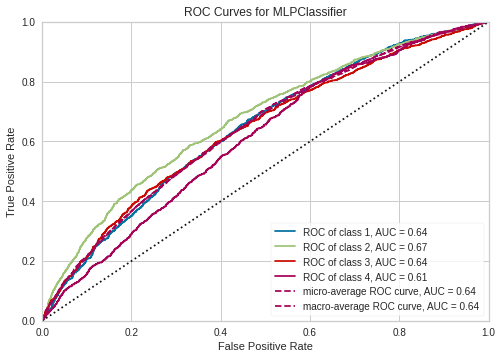

emotion_ID MLPaccuracy score on Train data for emotion_ID : 0.3817

emotion_ID MLP classification report on train data
              precision    recall  f1-score   support

       angry       0.38      0.37      0.37      3003
       happy       0.44      0.42      0.43      3108
         sad       0.40      0.38      0.39      3092
     neutral       0.31      0.36      0.33      2607

    accuracy                           0.38     11810
   macro avg       0.38      0.38      0.38     11810
weighted avg       0.38      0.38      0.38     11810




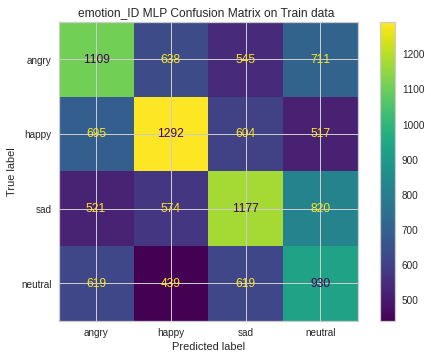

In [ ]:
clf_mlp_emotion = MLPClassifier( learning_rate='adaptive',max_iter=100,random_state=1)
param_grid = {'hidden_layer_sizes':np.arange(15,25),
              'activation':[ 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam']}
gs = GridSearchCV(estimator=clf_mlp_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","MLP")


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


best parameters{'activation': 'tanh', 'hidden_layer_sizes': 15, 'solver': 'sgd'}
max validation score0.5916172734970364


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Sex MLPaccuracy score on Test data for Sex : 0.5951
Sex MLP classification report on test data
              precision    recall  f1-score   support

      female       0.54      0.59      0.57      2216
        male       0.65      0.60      0.62      2753

    accuracy                           0.60      4969
   macro avg       0.59      0.60      0.59      4969
weighted avg       0.60      0.60      0.60      4969



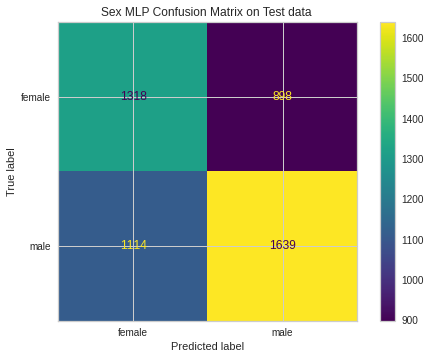

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


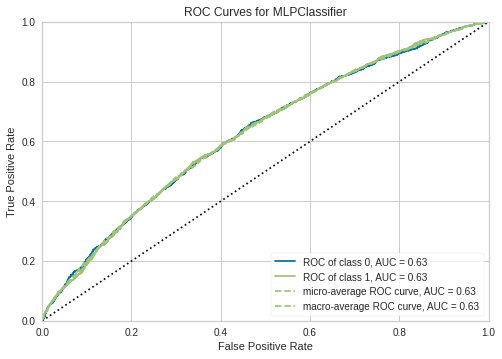

Sex MLPaccuracy score on Train data for Sex : 0.6285

Sex MLP classification report on train data
              precision    recall  f1-score   support

      female       0.56      0.63      0.59      5062
        male       0.69      0.63      0.66      6748

    accuracy                           0.63     11810
   macro avg       0.63      0.63      0.63     11810
weighted avg       0.64      0.63      0.63     11810




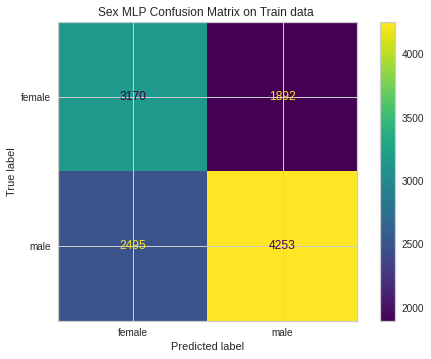

In [11]:
clf_mlp_sex = MLPClassifier( learning_rate='adaptive',max_iter=100,random_state=1)
param_grid = {'hidden_layer_sizes':np.arange(15,20),
              'activation':[ 'logistic', 'tanh', 'relu'],
              'solver':['lbfgs', 'sgd', 'adam']}
gs = GridSearchCV(estimator=clf_mlp_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=2)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","MLP")


**logistic regression**

emotion

best parameters{'solver': 'newton-cg'}
max validation score0.3690093141405589
emotion_ID LogisticRegressionaccuracy score on Test data for emotion_ID : 0.3693
emotion_ID LogisticRegression classification report on test data
              precision    recall  f1-score   support

       angry       0.35      0.36      0.36      1239
       happy       0.41      0.42      0.41      1186
         sad       0.39      0.39      0.39      1281
     neutral       0.32      0.31      0.32      1263

    accuracy                           0.37      4969
   macro avg       0.37      0.37      0.37      4969
weighted avg       0.37      0.37      0.37      4969



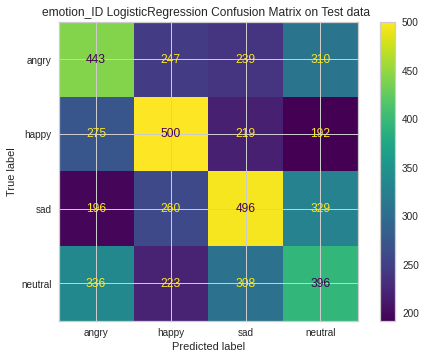

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


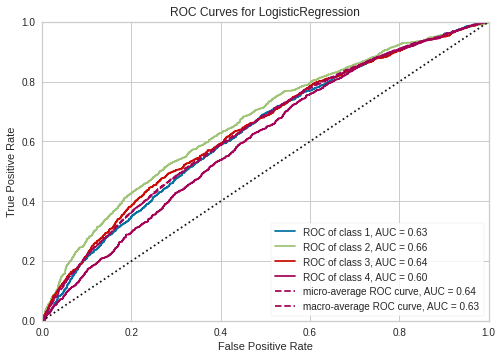

emotion_ID LogisticRegressionaccuracy score on Train data for emotion_ID : 0.3984

emotion_ID LogisticRegression classification report on train data
              precision    recall  f1-score   support

       angry       0.39      0.38      0.39      3045
       happy       0.43      0.45      0.44      2797
         sad       0.41      0.41      0.41      2991
     neutral       0.36      0.36      0.36      2977

    accuracy                           0.40     11810
   macro avg       0.40      0.40      0.40     11810
weighted avg       0.40      0.40      0.40     11810




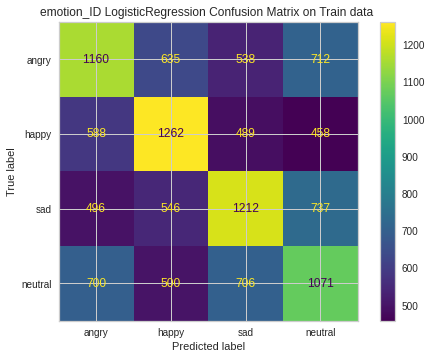

In [ ]:
clf_logistic_emotion = LogisticRegression(max_iter=1000000,random_state=1, penalty = 'l2')
param_grid = {'solver':[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=clf_logistic_emotion, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(x_train,y_train["emotion_ID"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["emotion_ID"]  , x_test , y_test["emotion_ID"] ,"emotion_ID","LogisticRegression")

sex

best parameters{'solver': 'sag'}
max validation score0.5940723836054719
Sex LogisticRegressionaccuracy score on Test data for Sex : 0.5848
Sex LogisticRegression classification report on test data
              precision    recall  f1-score   support

      female       0.49      0.59      0.54      2011
        male       0.68      0.58      0.62      2958

    accuracy                           0.58      4969
   macro avg       0.58      0.59      0.58      4969
weighted avg       0.60      0.58      0.59      4969



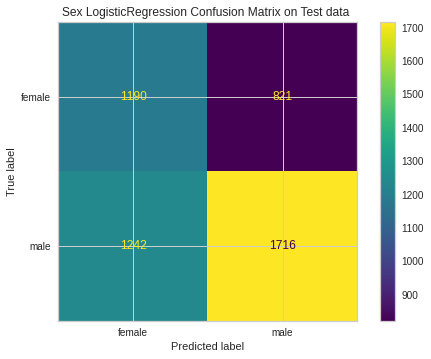

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


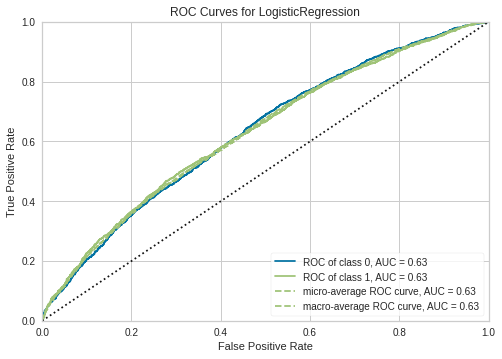

Sex LogisticRegressionaccuracy score on Train data for Sex : 0.6152

Sex LogisticRegression classification report on train data
              precision    recall  f1-score   support

      female       0.50      0.62      0.56      4582
        male       0.72      0.61      0.66      7228

    accuracy                           0.62     11810
   macro avg       0.61      0.62      0.61     11810
weighted avg       0.63      0.62      0.62     11810




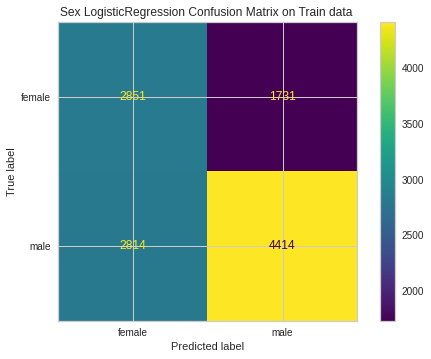

In [12]:
clf_logistic_sex = LogisticRegression(max_iter=1000000,random_state=1, penalty = 'l2')
param_grid = {'solver':[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=clf_logistic_sex, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)
gs.fit(x_train,y_train["Sex"])
print("best parameters"+str(gs.best_params_))
print("max validation score"+str(gs.best_score_))
Classifier_Report(gs.best_estimator_, x_train , y_train["Sex"]  , x_test , y_test["Sex"] ,"Sex","LogisticRegression")